In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
dir_path = "/kaggle/input/playground-series-s4e2/"
train_data = pd.read_csv(dir_path + "train.csv")
test_data = pd.read_csv(dir_path + "test.csv")

# 特徴量の前処理
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
boe = OrdinalEncoder()
train_data[binary_features] = pd.DataFrame(boe.fit_transform(train_data[binary_features]))
test_data[binary_features] = pd.DataFrame(boe.fit_transform(test_data[binary_features]))

cat_features = ['CAEC', 'CALC', 'MTRANS']
coe = OrdinalEncoder(categories = [
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['Walking', 'Bike', 'Public_Transportation', 'Motorbike', 'Automobile']
])
train_data[cat_features] = pd.DataFrame(coe.fit_transform(train_data[cat_features]))
test_data[cat_features] = pd.DataFrame(coe.fit_transform(test_data[cat_features]))

# 目的変数の前処理
ooe = OrdinalEncoder(categories = [['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
train_data.NObeyesdad = pd.DataFrame(ooe.fit_transform(train_data[['NObeyesdad']]))

# BMI
train_data['BMI'] = pd.DataFrame(train_data.Weight / (train_data.Height**2))
test_data['BMI'] = pd.DataFrame(test_data.Weight / (test_data.Height**2))

線形回帰:  
LinearRegression  
Lasso  
Ridge  

In [3]:
def predictor(model, x_tr, x_te, y_tr, y_te):
    model.fit(x_tr, y_tr)
    pre = model.predict(x_te)
    for i in range(len(y_te)):      # 連続型のデータを離散型のデータに変える
        pre[i] = round(pre[i])      # 出力を整数に丸める
        if pre[i] < 0:
            pre[i] = 0
        elif pre[i] > 6:
            pre[i] = 6
    return sum((pre - y_te) == 0)/len(y_te)

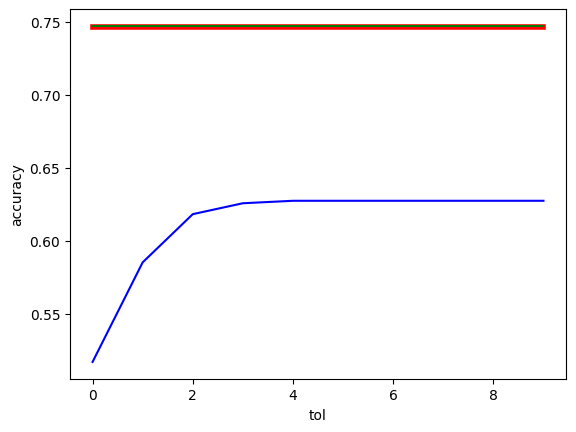

In [4]:
# tol
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
pre_lr = []
pre_la = []
pre_ri = []
for i in range(10):
    lr = LinearRegression()
    la = Lasso(tol = 0.1**i)
    ri = Ridge(tol = 0.1**i)
    pre_lr.append(predictor(lr, X_train, X_test, y_train, y_test))
    pre_la.append(predictor(la, X_train, X_test, y_train, y_test))
    pre_ri.append(predictor(ri, X_train, X_test, y_train, y_test))
fig = plt.figure()
plt.plot(pre_lr, color = 'red', linewidth = 4)
plt.plot(pre_la, color = 'blue')
plt.plot(pre_ri, color = 'green')
plt.xlabel("tol")
plt.ylabel("accuracy")
plt.show()

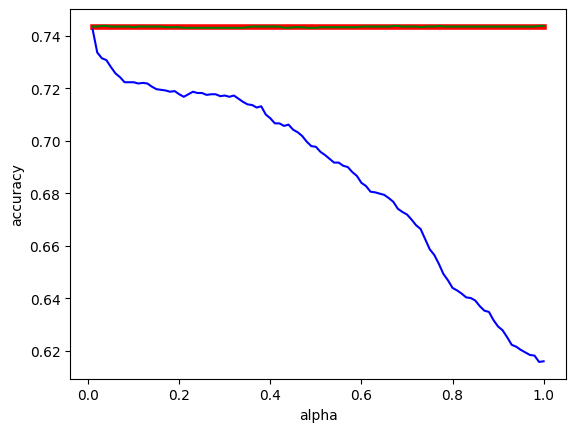

In [5]:
# alpha
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
xaxis = []
pre_lr = []
pre_la = []
pre_ri = []
i = 0
while i < 1:
    i += 0.01
    xaxis.append(i)
    lr = LinearRegression()
    la = Lasso(alpha = i, tol = 0.01)
    ri = Ridge(alpha = i, tol = 0.01)
    pre_lr.append(predictor(lr, X_train, X_test, y_train, y_test))
    pre_la.append(predictor(la, X_train, X_test, y_train, y_test))
    pre_ri.append(predictor(ri, X_train, X_test, y_train, y_test))
fig = plt.figure()
plt.plot(xaxis, pre_lr, color = 'red', linewidth = 4)
plt.plot(xaxis, pre_la, color = 'blue')
plt.plot(xaxis, pre_ri, color = 'green')
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.show()

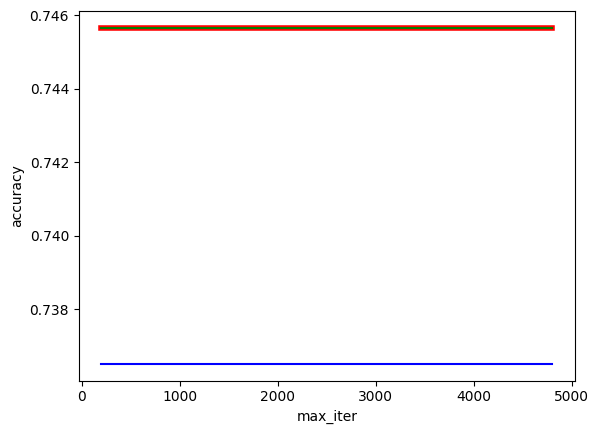

In [6]:
# max_iter
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
xaxis = []
pre_lr = []
pre_la = []
pre_ri = []
for i in range(200, 5000, 200):
    xaxis.append(i)
    lr = LinearRegression()
    la = Lasso(alpha = 0.01, tol = 0.01, max_iter = i)
    ri = Ridge(alpha = 0.01, tol = 0.01, max_iter = i)
    pre_lr.append(predictor(lr, X_train, X_test, y_train, y_test))
    pre_la.append(predictor(la, X_train, X_test, y_train, y_test))
    pre_ri.append(predictor(ri, X_train, X_test, y_train, y_test))
fig = plt.figure()
plt.plot(xaxis, pre_lr, color = 'red', linewidth = 4)
plt.plot(xaxis, pre_la, color = 'blue')
plt.plot(xaxis, pre_ri, color = 'green')
plt.xlabel("max_iter")
plt.ylabel("accuracy")
plt.show()

ロジスティック回帰:  
LogisticRegression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

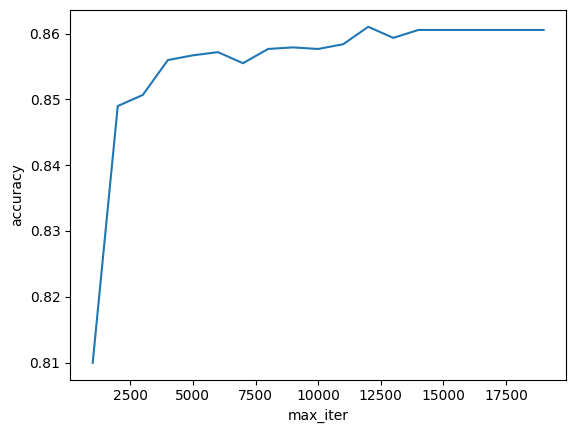

In [7]:
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)

sco_lg = []
xaxis = []
for i in range(1000, 20000, 1000):
    xaxis.append(i)
    logr = LogisticRegression(max_iter = i, multi_class = 'multinomial')
    logr.fit(X_train, y_train)
    sco_lg.append(logr.score(X_test, y_test))
fig = plt.figure()
plt.plot(xaxis, sco_lg)
plt.xlabel("max_iter")
plt.ylabel("accuracy")
plt.show()

サポートベクターマシン:  
LinearSVC  
SVC

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

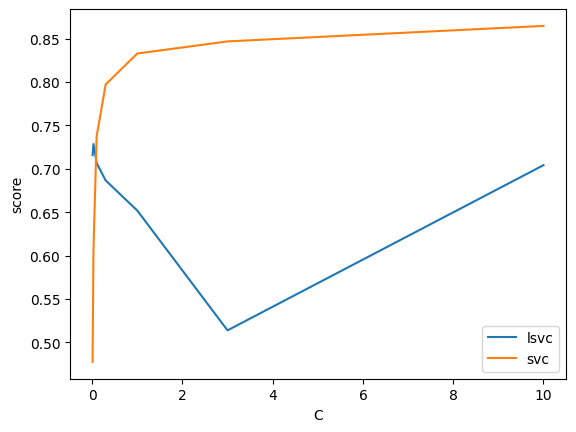

In [8]:
# C
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)

Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
lsvc_score = []
svc_score = []
for c in Cs:
    lsvc = LinearSVC(C = c)
    svc = SVC(C = c)
    lsvc.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    lsvc_score.append(lsvc.score(X_test, y_test))
    svc_score.append(svc.score(X_test, y_test))
fig = plt.figure()
plt.plot(Cs, lsvc_score, label = "lsvc")
plt.plot(Cs, svc_score, label = "svc")
plt.xlabel("C")
plt.ylabel("score")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:29

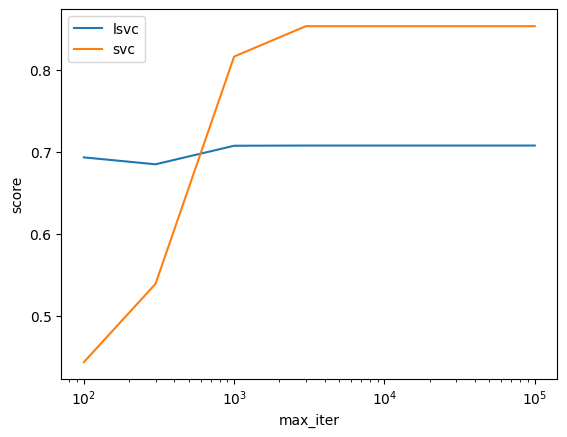

In [9]:
# max_iter
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
max_iters = [100, 300, 1000, 3000, 10000, 30000, 100000]
lsvc_score = []
svc_score = []
for mi in max_iters:
    lsvc = LinearSVC(C = 0.01, max_iter = mi)
    svc = SVC(C = 10, max_iter = mi)
    lsvc.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    lsvc_score.append(lsvc.score(X_test, y_test))
    svc_score.append(svc.score(X_test, y_test))
fig = plt.figure()
plt.plot(max_iters, lsvc_score, label = "lsvc")
plt.plot(max_iters, svc_score, label = "svc")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.xscale("log")
plt.legend()
plt.show()

In [10]:
# kernel
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # precomputedがerrorになる。precomputedは正方行列型のデータが必要
for k in kernels:
    svc = SVC(C = 10, max_iter = 3000, kernel = k)
    svc.fit(X_train, y_train)
    print(k.ljust(7), ":", svc.score(X_test, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


linear  : 0.29214836223506746


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


poly    : 0.8591040462427746
rbf     : 0.8605491329479769
sigmoid : 0.02336223506743738


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider

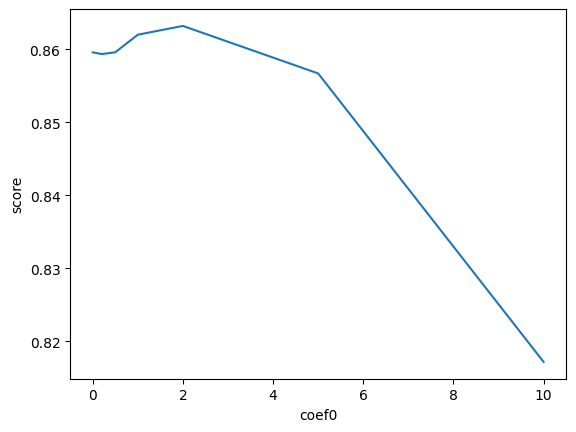

In [11]:
# coef0
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
coef0s = [0, 0.2, 0.5, 1, 2, 5, 10]
svc_score = []
for co in coef0s:
    svc = SVC(C = 10, max_iter = 3000, kernel = 'poly', coef0 = co)
    svc.fit(X_train, y_train)
    svc_score.append(svc.score(X_test, y_test))
fig = plt.figure()
plt.plot(coef0s, svc_score, label = "svc")
plt.xlabel("coef0")
plt.ylabel("score")
plt.show()

In [12]:
# probability
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
svc = SVC(C = 10, max_iter = 3000, kernel = 'poly', coef0 = 2, probability = True)
svc.fit(X_train, y_train)
print("probability = True :", svc.score(X_test, y_test))
svc = SVC(C = 10, max_iter = 3000, kernel = 'poly', coef0 = 2, probability = False)
svc.fit(X_train, y_train)
print("probability = False:", svc.score(X_test, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


probability = True : 0.8600674373795761


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


probability = False: 0.8600674373795761


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider

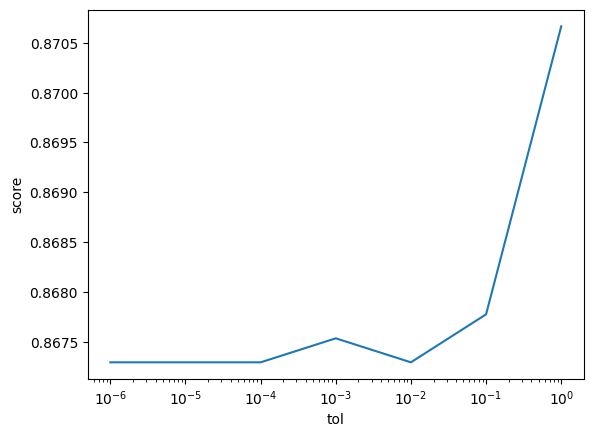

In [13]:
# tol
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI']
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data.NObeyesdad, test_size = 0.2)
tols = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
svc_score = []
for t in tols:
    svc = SVC(C = 10, max_iter = 3000, kernel = 'poly', coef0 = 2, probability = False, tol = t)
    svc.fit(X_train, y_train)
    svc_score.append(svc.score(X_test, y_test))
fig = plt.figure()
plt.plot(tols, svc_score, label = "svc")
plt.xlabel("tol")
plt.ylabel("score")
plt.xscale("log")
plt.show()